<a href="https://colab.research.google.com/github/sneh20122001/Pytorch_December2025/blob/main/001_Practice_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 01

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [3]:
# Create Dataset

weight = 2.5
bias = -1.0

start = -1
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[-1.0000],
         [-0.9800],
         [-0.9600],
         [-0.9400],
         [-0.9200],
         [-0.9000],
         [-0.8800],
         [-0.8600],
         [-0.8400],
         [-0.8200]]),
 tensor([[-3.5000],
         [-3.4500],
         [-3.4000],
         [-3.3500],
         [-3.3000],
         [-3.2500],
         [-3.2000],
         [-3.1500],
         [-3.1000],
         [-3.0500]]))

In [4]:
# Train–Test Split

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(80, 20)

In [5]:
# Plot Function

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend()
  plt.show()

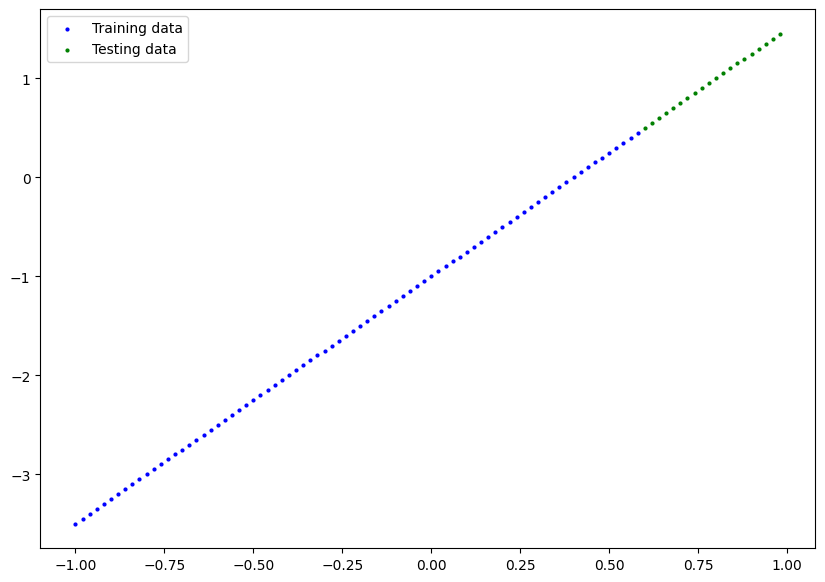

In [6]:
plot_predictions()

In [7]:
# Create Linear Regression Model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, x):
        return self.weights * x + self.bias

torch.manual_seed(0)
model_1 = LinearRegressionModel()
model_1.state_dict()

OrderedDict([('weights', tensor([1.5410])), ('bias', tensor([-0.2934]))])

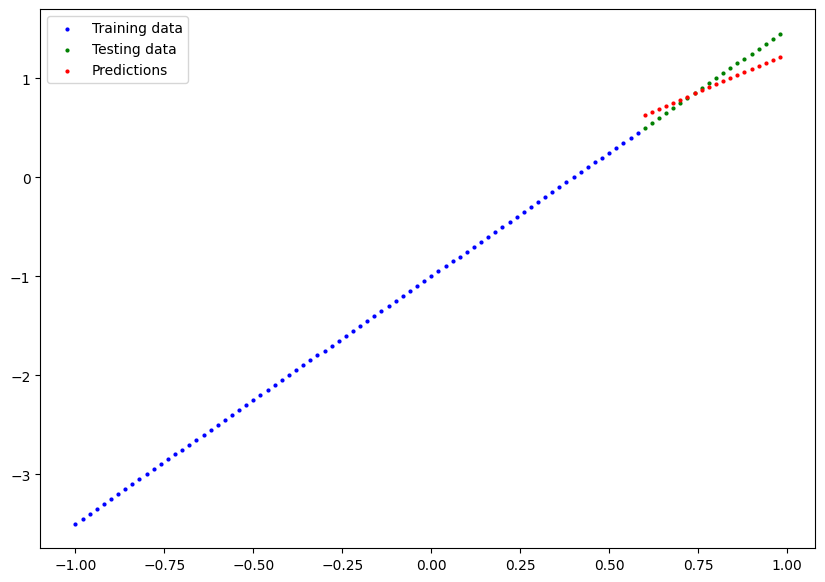

In [8]:
# Predictions Before Training

with torch.inference_mode():
    y_preds = model_1(X_test)

plot_predictions(predictions=y_preds)


In [9]:
# Loss Function & Optimizer

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(
    params=model_1.parameters(),
    lr=0.01
)


In [10]:
# Training Loop

torch.manual_seed(0)
epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    # Training
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")


Epoch 0 | Train Loss: 0.9079619646072388 | Test Loss: 0.10489313304424286
Epoch 10 | Train Loss: 0.8035520315170288 | Test Loss: 0.147926926612854
Epoch 20 | Train Loss: 0.7003540396690369 | Test Loss: 0.22474880516529083
Epoch 30 | Train Loss: 0.6118879318237305 | Test Loss: 0.2931440472602844
Epoch 40 | Train Loss: 0.5380078554153442 | Test Loss: 0.34751707315444946
Epoch 50 | Train Loss: 0.47544559836387634 | Test Loss: 0.39044615626335144
Epoch 60 | Train Loss: 0.42213064432144165 | Test Loss: 0.422726571559906
Epoch 70 | Train Loss: 0.3764978051185608 | Test Loss: 0.4456927180290222
Epoch 80 | Train Loss: 0.3372010886669159 | Test Loss: 0.4602869153022766
Epoch 90 | Train Loss: 0.3031155467033386 | Test Loss: 0.4671189785003662


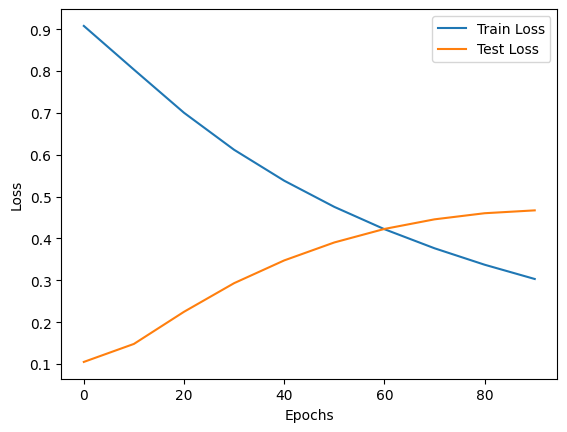

In [11]:
# Loss Curve
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [12]:
# Learned Parameters vs Original
print("Learned parameters:")
print(model_1.state_dict())

print("\nOriginal parameters:")
print(f"Weight: {weight}, Bias: {bias}")


Learned parameters:
OrderedDict({'weights': tensor([1.8772]), 'bias': tensor([-0.9757])})

Original parameters:
Weight: 2.5, Bias: -1.0


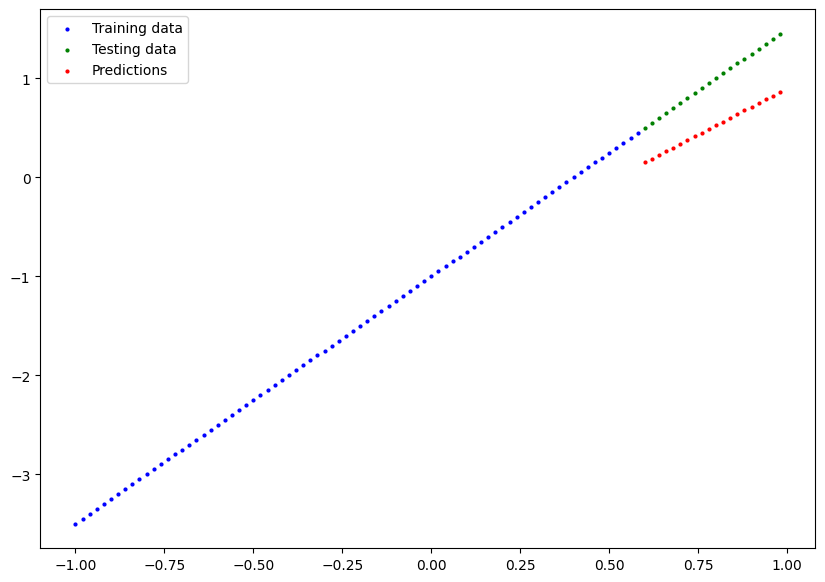

In [13]:
# Final Predictions
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)

plot_predictions(predictions=y_preds)


## 02

In [15]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [16]:
# Create Dataset (Ground Truth)

weight = 3.0
bias = 0.5

X = torch.arange(-1, 1, 0.02).unsqueeze(dim=1)

y = weight * X + bias

In [18]:
# Train–Test Split (80/20 Rule)

train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

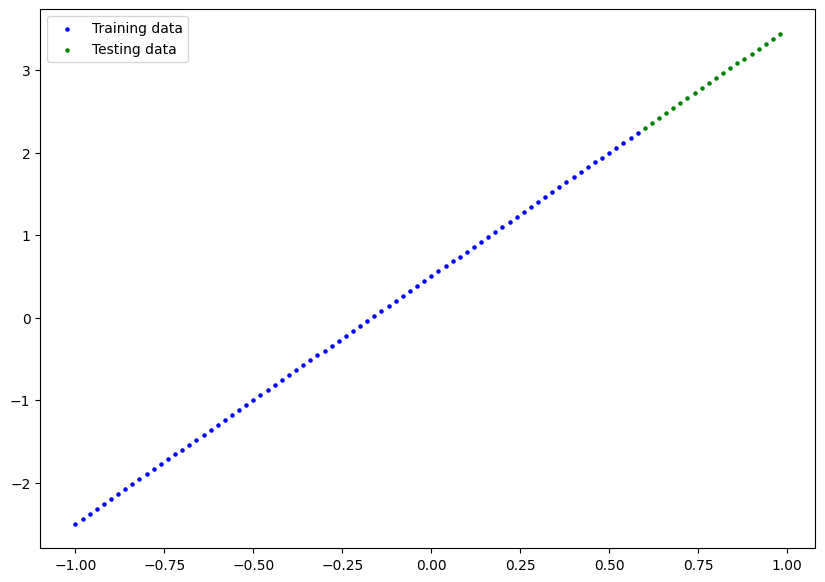

In [20]:
# Visualization Function

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="blue", s=5, label="Training data")
    plt.scatter(test_data, test_labels, c="green", s=5, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="red", s=5, label="Predictions")

    plt.legend()
    plt.show()


plot_predictions()

In [21]:
# Build Linear Regression Model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.weight * x + self.bias


In [22]:
# Create Model Instance
torch.manual_seed(42)
model = LinearRegressionModel()

model.state_dict()


OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

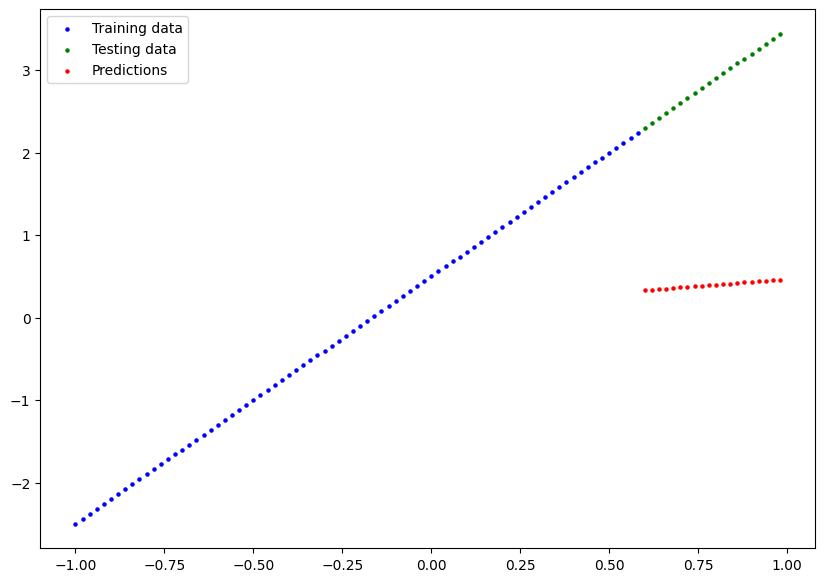

In [23]:
# Make Predictions (Before Training)
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)

plot_predictions(predictions=y_preds)


In [24]:
# Loss Function & Optimizer
loss_fn = nn.L1Loss()   # Mean Absolute Error

optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.01
)

In [25]:
# Training Loop
epochs = 100

for epoch in range(epochs):

    # Training
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")


Epoch 0 | Train Loss: 1.0734810829162598 | Test Loss: 2.4729108810424805
Epoch 10 | Train Loss: 1.0557119846343994 | Test Loss: 2.4479665756225586
Epoch 20 | Train Loss: 1.0380513668060303 | Test Loss: 2.422800064086914
Epoch 30 | Train Loss: 1.020390510559082 | Test Loss: 2.3976335525512695
Epoch 40 | Train Loss: 1.0028094053268433 | Test Loss: 2.372030019760132
Epoch 50 | Train Loss: 0.9857903718948364 | Test Loss: 2.344679355621338
Epoch 60 | Train Loss: 0.9687714576721191 | Test Loss: 2.317328691482544
Epoch 70 | Train Loss: 0.9517521858215332 | Test Loss: 2.28997802734375
Epoch 80 | Train Loss: 0.9347902536392212 | Test Loss: 2.2621986865997314
Epoch 90 | Train Loss: 0.9183251261711121 | Test Loss: 2.232703685760498


In [26]:
# Check Learned Parameters
print("Learned parameters:")
print(model.state_dict())

print("\nOriginal parameters:")
print(f"Weight: {weight}, Bias: {bias}")


Learned parameters:
OrderedDict({'weight': tensor([0.7469]), 'bias': tensor([0.0738])})

Original parameters:
Weight: 3.0, Bias: 0.5


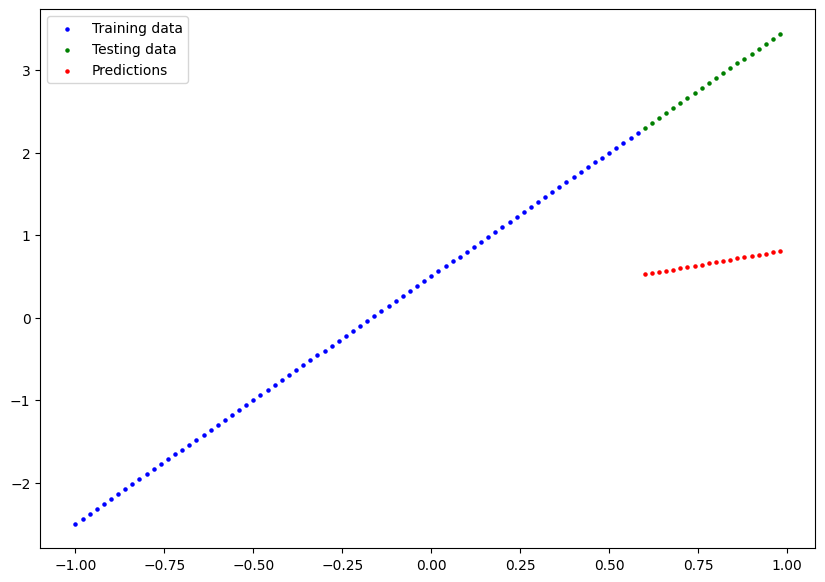

In [27]:
# Final Predictions
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)

plot_predictions(predictions=y_preds)


## 03

In [28]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [29]:
# Create Dataset with Noise
torch.manual_seed(42)

weight = 4.0
bias = -2.0

X = torch.linspace(-2, 2, 100).unsqueeze(1)

noise = torch.randn(X.shape) * 0.5

y = weight * X + bias + noise


In [30]:
# Train–Test Split
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


In [31]:
# Visualization Function
def plot_predictions(train_data, train_labels,
                     test_data, test_labels,
                     predictions=None):

    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="blue", s=10, label="Train data")
    plt.scatter(test_data, test_labels, c="green", s=10, label="Test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="red", s=10, label="Predictions")

    plt.legend()
    plt.show()


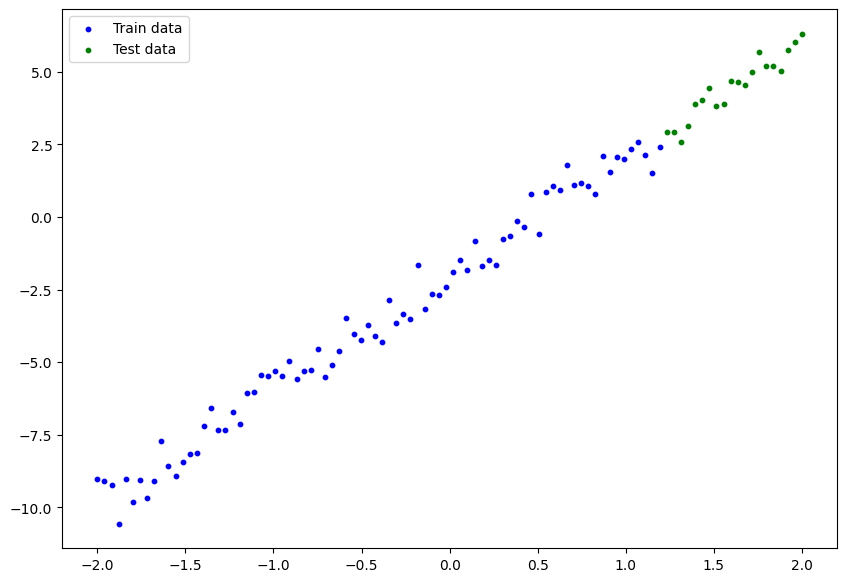

In [32]:
plot_predictions(X_train, y_train, X_test, y_test)

In [33]:
# Build Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.weight * x + self.bias


In [34]:
# Initialize Model
model = LinearRegressionModel()
model.state_dict()

OrderedDict([('weight', tensor([-0.5672])), ('bias', tensor([-0.5706]))])

In [35]:
# Loss Function & Optimizer
loss_fn = nn.MSELoss()   # Mean Squared Error (better for noisy data)

optimizer = torch.optim.SGD(
    model.parameters(),
    lr=0.05
)


In [36]:
# Training Loop
epochs = 200

for epoch in range(epochs):

    # Training
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 20 == 0:
        print(f"Epoch {epoch} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")


Epoch 0 | Train Loss: 28.8531 | Test Loss: 30.7044
Epoch 20 | Train Loss: 0.5546 | Test Loss: 1.4182
Epoch 40 | Train Loss: 0.2921 | Test Loss: 0.2041
Epoch 60 | Train Loss: 0.2755 | Test Loss: 0.1161
Epoch 80 | Train Loss: 0.2742 | Test Loss: 0.1084
Epoch 100 | Train Loss: 0.2741 | Test Loss: 0.1075
Epoch 120 | Train Loss: 0.2741 | Test Loss: 0.1073
Epoch 140 | Train Loss: 0.2741 | Test Loss: 0.1073
Epoch 160 | Train Loss: 0.2741 | Test Loss: 0.1073
Epoch 180 | Train Loss: 0.2741 | Test Loss: 0.1073


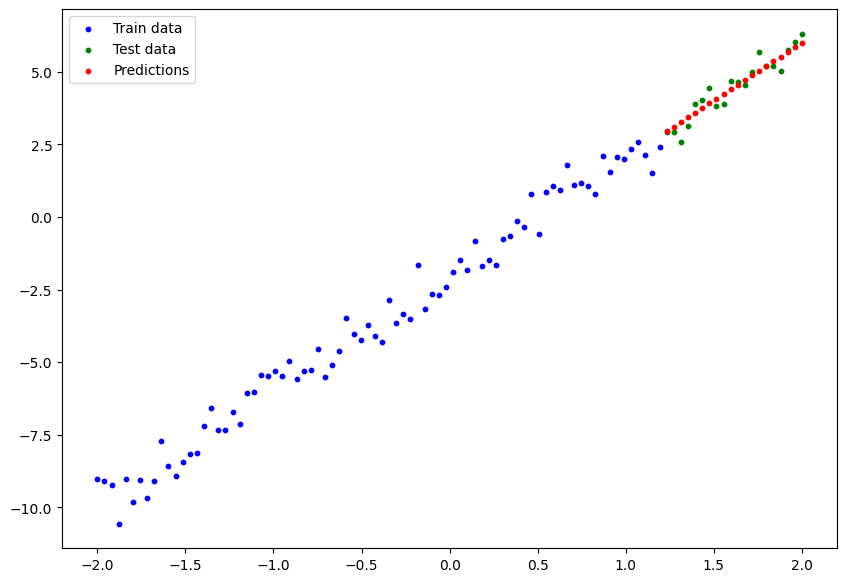

In [37]:
# Visualize Predictions
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_preds)


In [38]:
# Predict on Completely New Data
# New unseen data
new_X = torch.tensor([[-3.0], [0.0], [2.5], [4.0]])

model.eval()
with torch.inference_mode():
    new_predictions = model(new_X)

new_predictions


tensor([[-13.9386],
        [ -1.9711],
        [  8.0019],
        [ 13.9856]])

In [39]:
# Compare Learned Parameters
print("Learned parameters:")
print(model.state_dict())

print("\nOriginal (hidden) parameters:")
print(f"Weight: {weight}, Bias: {bias}")


Learned parameters:
OrderedDict({'weight': tensor([3.9892]), 'bias': tensor([-1.9711])})

Original (hidden) parameters:
Weight: 4.0, Bias: -2.0


# 04

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [11]:
# Create Multivariate Dataset
torch.manual_seed(42)

# Raw features
size = torch.linspace(500, 2500, 100).unsqueeze(1)   # house size
rooms = torch.randint(1, 6, (100, 1))                # number of rooms

# Combine features
X = torch.cat([size, rooms], dim=1)

# Target (price)
y = 0.05 * size + 2 * rooms + 10



In [13]:
# Train–Test Split
# Normalize features
X_mean = X.mean(dim=0)
X_std = X.std(dim=0)

X_norm = (X - X_mean) / X_std

train_split = int(0.8 * len(X_norm))

X_train, y_train = X_norm[:train_split], y[:train_split]
X_test, y_test = X_norm[train_split:], y[train_split:]



In [14]:
# Build Multivariate Linear Regression Model
class MultiLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)



In [15]:
# Initialize Model
torch.manual_seed(42)
model = MultiLinearRegressionModel()
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.5406, 0.5869]])),
             ('linear.bias', tensor([-0.1657]))])

In [16]:
# Loss Function & Optimizer
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(
    model.parameters(),
    lr=0.01
)

In [17]:
# Training Loop
epochs = 500

for epoch in range(epochs):

    # Training
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 50 == 0:
        print(f"Epoch {epoch} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")


Epoch 0 | Train Loss: 7160.9468 | Test Loss: 16806.2285
Epoch 50 | Train Loss: 1395.4070 | Test Loss: 5982.2920
Epoch 100 | Train Loss: 406.1016 | Test Loss: 2145.0098
Epoch 150 | Train Loss: 138.4770 | Test Loss: 771.6344
Epoch 200 | Train Loss: 49.2928 | Test Loss: 278.0151
Epoch 250 | Train Loss: 17.7299 | Test Loss: 100.2440
Epoch 300 | Train Loss: 6.3930 | Test Loss: 36.1591
Epoch 350 | Train Loss: 2.3066 | Test Loss: 13.0456
Epoch 400 | Train Loss: 0.8323 | Test Loss: 4.7072
Epoch 450 | Train Loss: 0.3004 | Test Loss: 1.6986


In [18]:
# Evaluate Model Parameters

print("Learned parameters:")
print(model.state_dict())


Learned parameters:
OrderedDict({'linear.weight': tensor([[28.9272,  3.0278]]), 'linear.bias': tensor([90.8551])})


In [19]:
# Predict on New House Data

# New house data (raw)
new_houses = torch.tensor([
    [1200.0, 3.0],
    [1800.0, 4.0],
    [2200.0, 5.0]
])

# Normalize new data
new_houses_norm = (new_houses - X_mean) / X_std

model.eval()
with torch.inference_mode():
    price_predictions = model(new_houses_norm)

price_predictions



tensor([[ 75.9269],
        [107.5641],
        [129.3302]])

# 05

In [20]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [21]:
# Create Realistic Dataset

torch.manual_seed(42)
np.random.seed(42)

num_samples = 1000

age = np.random.randint(18, 65, size=(num_samples, 1))
bmi = np.random.uniform(18, 40, size=(num_samples, 1))

# Insurance charge formula (hidden truth)
charges = (
    age * 250 +
    bmi * 350 +
    np.random.normal(0, 2000, size=(num_samples, 1))
)

X = np.hstack([age, bmi])
y = charges


In [22]:
# Train–Test Split

split = int(0.8 * num_samples)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [23]:
# Feature Normalization

X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std


In [24]:
# Custom Dataset Class

class InsuranceDataset(Dataset):
    def __init__(self, features, labels):
        self.X = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [25]:
# DataLoader (Batching, Shuffling)
train_dataset = InsuranceDataset(X_train, y_train)
test_dataset = InsuranceDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


In [26]:
# Neural Network Model
class InsuranceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        return self.network(x)


In [27]:
# Initialize Model, Loss, Optimizer
model = InsuranceModel()

loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=0.01
)

In [28]:
# Training Loop
epochs = 50

for epoch in range(epochs):

    model.train()
    train_loss = 0

    for X_batch, y_batch in train_loader:
        preds = model(X_batch)
        loss = loss_fn(preds, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)

    # Evaluation
    model.eval()
    test_loss = 0
    with torch.inference_mode():
        for X_batch, y_batch in test_loader:
            preds = model(X_batch)
            loss = loss_fn(preds, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)

    print(
        f"Epoch {epoch+1:02d} | "
        f"Train Loss: {train_loss:.2f} | "
        f"Test Loss: {test_loss:.2f}"
    )


Epoch 01 | Train Loss: 442087212.80 | Test Loss: 428076571.43
Epoch 02 | Train Loss: 441600001.28 | Test Loss: 427091538.29
Epoch 03 | Train Loss: 439642837.76 | Test Loss: 423852484.57
Epoch 04 | Train Loss: 434427389.44 | Test Loss: 416324137.14
Epoch 05 | Train Loss: 423602311.68 | Test Loss: 402345984.00
Epoch 06 | Train Loss: 405013488.64 | Test Loss: 379905942.86
Epoch 07 | Train Loss: 376953533.44 | Test Loss: 347856288.00
Epoch 08 | Train Loss: 338623024.64 | Test Loss: 306464288.00
Epoch 09 | Train Loss: 290985000.96 | Test Loss: 257294736.00
Epoch 10 | Train Loss: 237013942.40 | Test Loss: 203537579.43
Epoch 11 | Train Loss: 180606147.20 | Test Loss: 150476169.14
Epoch 12 | Train Loss: 127673452.16 | Test Loss: 103312553.14
Epoch 13 | Train Loss: 83222736.16 | Test Loss: 66089474.86
Epoch 14 | Train Loss: 50632504.96 | Test Loss: 40480509.14
Epoch 15 | Train Loss: 29701237.52 | Test Loss: 24919500.57
Epoch 16 | Train Loss: 17989328.32 | Test Loss: 16485959.00
Epoch 17 | Train

In [29]:
torch.save({
    "model_state": model.state_dict(),
    "X_mean": X_mean,
    "X_std": X_std
}, "insurance_model.pth")


In [33]:
checkpoint = torch.load(
    "insurance_model.pth",
    weights_only=False   # IMPORTANT
)

loaded_model = InsuranceModel()
loaded_model.load_state_dict(checkpoint["model_state"])
loaded_model.eval()

X_mean = checkpoint["X_mean"]
X_std = checkpoint["X_std"]


In [34]:
# New customer data: [age, bmi]
new_customer = np.array([[45, 28]])

# Normalize
new_customer = (new_customer - X_mean) / X_std
new_customer = torch.tensor(new_customer, dtype=torch.float32)

with torch.inference_mode():
    predicted_charge = loaded_model(new_customer)

predicted_charge


tensor([[20616.1445]])